In [1]:
from services.preprocess import Preprocess
from services.statistical_evaluation import statistical_evaluation
from services.ml_evaluation import evaluate_model

# Data Pre-processing for TGAN

In [2]:
pp = Preprocess()

In [3]:
synthetic_data, real_data = pp.run_preprocess("customer_churn_dataset-training-master.csv", "synthetic_data_tgan.csv")


data loaded, shape - (440833, 12)
data loaded, shape - (500000, 11)


In [4]:
real_data.head()


,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [5]:
synthetic_data.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,25.0,Female,41.0,4.0,6.0,12.0,Standard,Monthly,559.51,15.0,1.0
1,51.0,Female,6.0,17.0,9.0,23.0,Standard,Quarterly,780.72,13.0,1.0
2,56.0,Male,57.0,28.0,8.0,4.0,Premium,Annual,141.03,11.0,1.0
3,62.0,Male,47.0,16.0,2.0,20.0,Basic,Quarterly,688.73,22.0,0.0
4,43.0,Male,20.0,22.0,1.0,22.0,Standard,Monthly,539.29,13.0,0.0


# Evaluating Statistical Similarity Between Real and Synthetic Data Using TGAN

### Comparing the distribution

In [6]:
se = statistical_evaluation(real_data, synthetic_data)

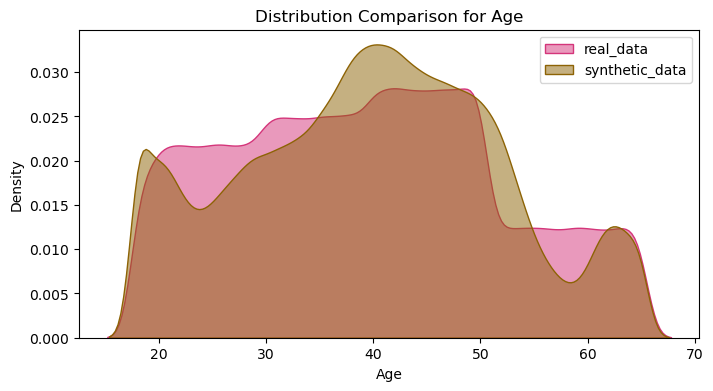

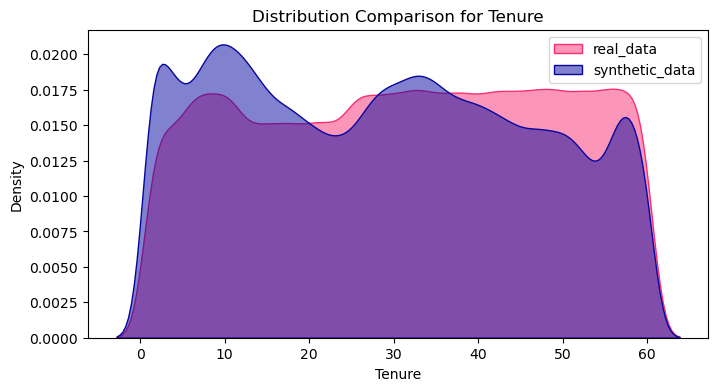

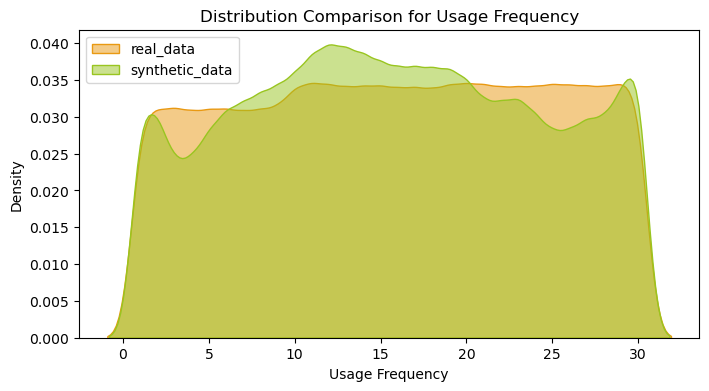

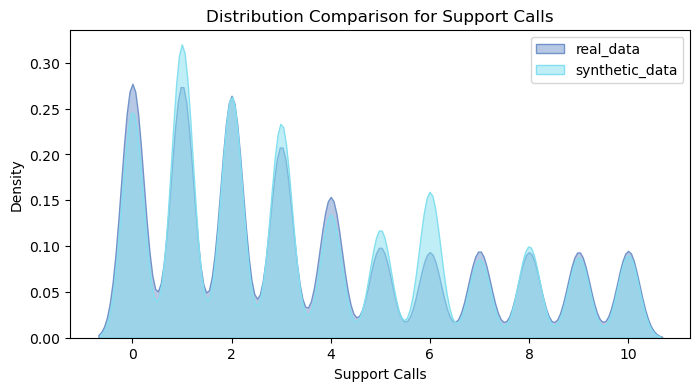

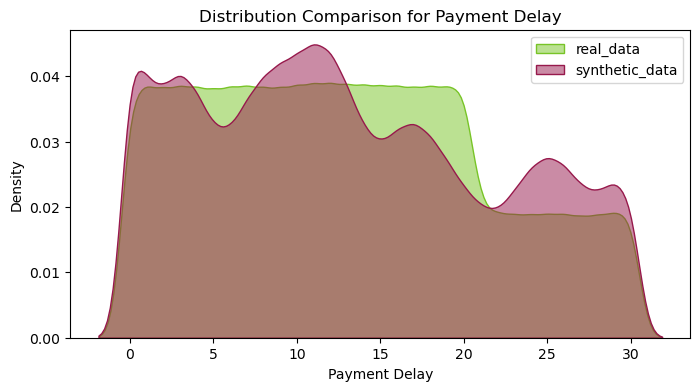

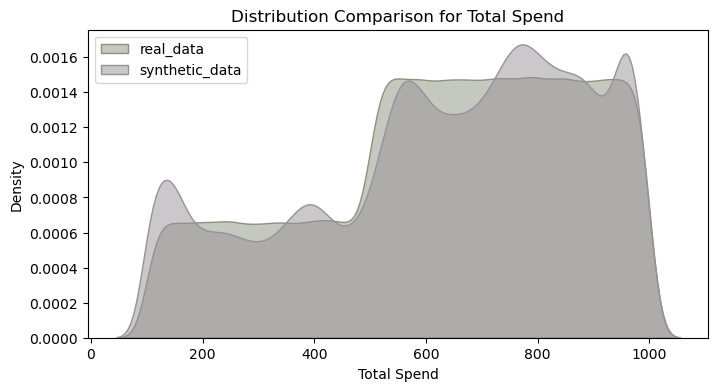

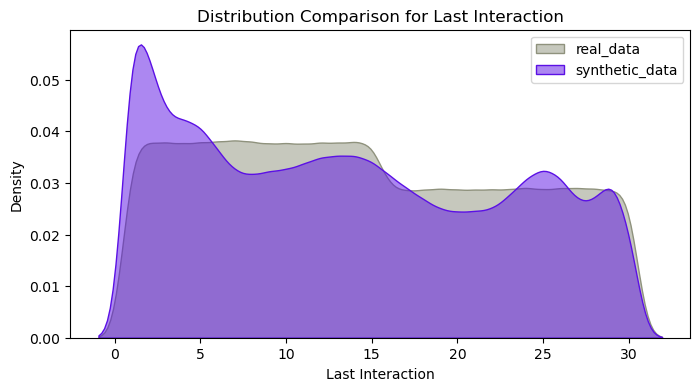

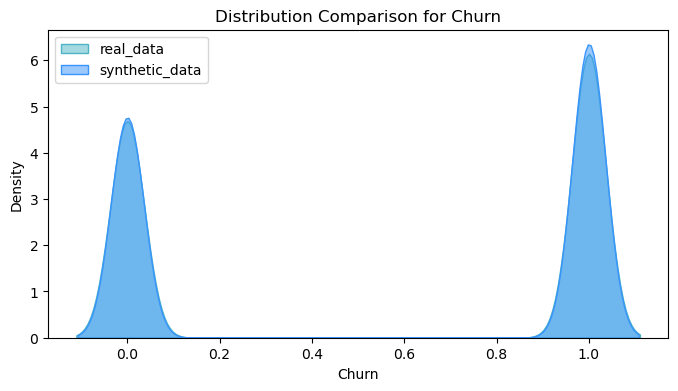

In [7]:
se.compare_all_distributions()

### Chi-Square test

The Chi-Square Test of Independence is a statistical test used to determine whether there's a significant relationship between two categorical variables.

We are checking "Is the distribution of categories in the synthetic data significantly different from the real data?"

Chi2 (Chi-square statistic): A higher value means more difference between the real and synthetic distributions.

p-value: The probability that the difference is due to chance.

- If p < 0.05: You reject the null hypothesis, meaning the distributions are significantly different.

- If p ≥ 0.05: You fail to reject the null hypothesis, meaning the distributions are not significantly different (which is good in your case — it means the synthetic data closely resembles the real data).

Gender: Chi-Square Stat=0.5902, p-value=0.4423
Subscription Type: Chi-Square Stat=1.4754, p-value=0.8310
Contract Length: Chi-Square Stat=3.5368, p-value=0.4723


c:\Users\joyri\OneDrive\Documents\Classes\Emerging Technologies\GAN-vs-VAE-synthetic-data-comparison\services\statistical_evaluation.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_name, y="Feature", data=results_df, ax=axes[0], palette=self.get_random_palette_name())
c:\Users\joyri\OneDrive\Documents\Classes\Emerging Technologies\GAN-vs-VAE-synthetic-data-comparison\services\statistical_evaluation.py:111: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\joyri\OneDrive\Documents\Classes\Emerging Technologies\GAN-vs-VAE-synthetic-data-comparison\services\statistical_evaluation.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed i

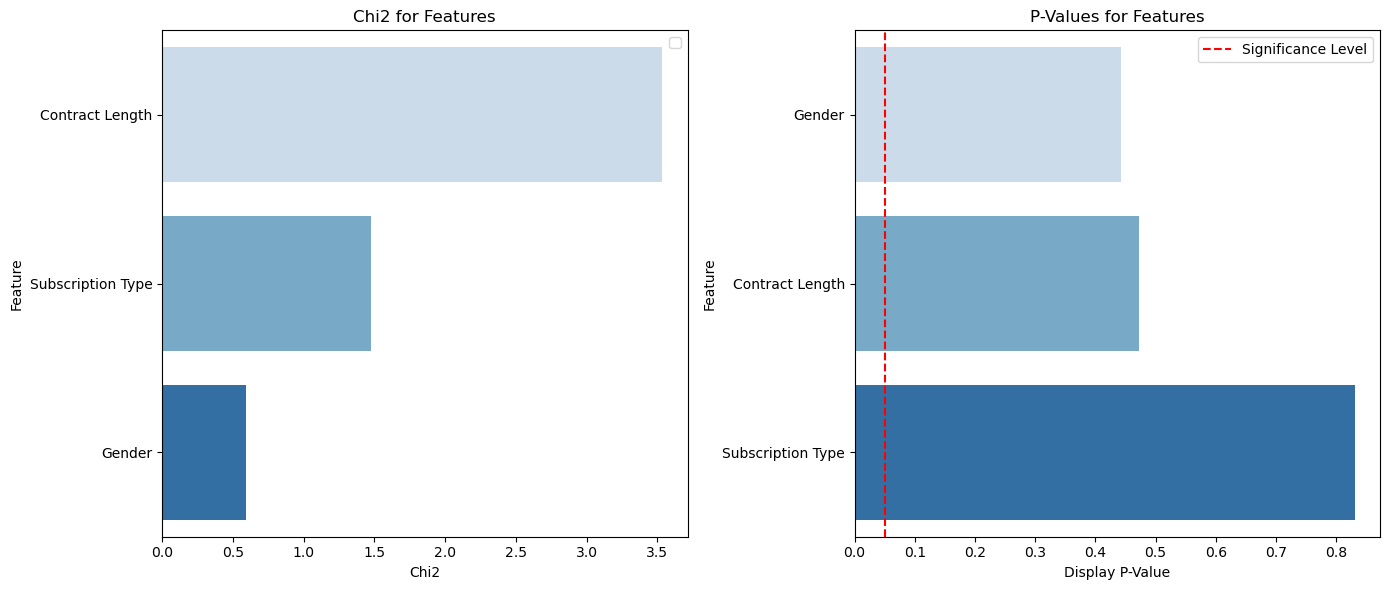

In [8]:
se.bar_plot_test_results(se.chi_square_test())

All our p-values are well above 0.05, which means our synthetic data mimics the real categorical distributions quite well. That’s what we want from a good synthetic data generator — no statistically significant divergence from the real data.

### Kolmogorov–Smirnov test

The KS test is a non-parametric test used to compare two continuous distributions (in this case, real vs. synthetic data for each numeric feature). It answers:
- “Do these two datasets come from the same distribution?”

- It compares the empirical cumulative distribution functions (ECDFs) of the two datasets.

- It finds the maximum distance (D) between those two ECDFs — that’s your KS Statistic.

- A small KS statistic means the distributions are similar.

- The p-value tells us if the difference is statistically significant.

KS Statistic:
- A number between 0 and 1 — lower is better (closer match).

- < 0.1 → very close

- 0.1 to 0.2 → small difference

- > 0.2 → noticeable difference

p-value:

- p < 0.05: Statistically significant difference between real and synthetic.

- p ≥ 0.05: No significant difference (ideal case).

c:\Users\joyri\OneDrive\Documents\Classes\Emerging Technologies\GAN-vs-VAE-synthetic-data-comparison\services\statistical_evaluation.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_name, y="Feature", data=results_df, ax=axes[0], palette=self.get_random_palette_name())
c:\Users\joyri\OneDrive\Documents\Classes\Emerging Technologies\GAN-vs-VAE-synthetic-data-comparison\services\statistical_evaluation.py:111: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\joyri\OneDrive\Documents\Classes\Emerging Technologies\GAN-vs-VAE-synthetic-data-comparison\services\statistical_evaluation.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed i

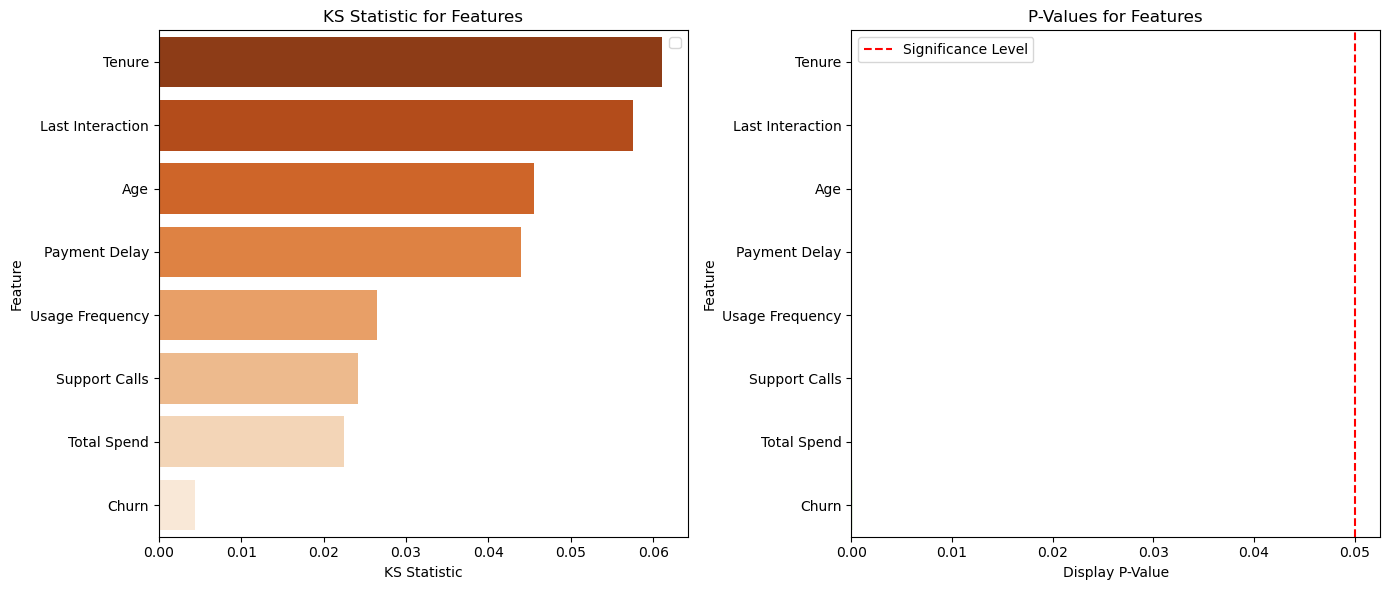

In [9]:
se.bar_plot_test_results(se.ks_test())

- All KS statistics are small → your synthetic data does resemble real data numerically.

- But p-values are all < 0.05, meaning the differences are statistically significant, even if small.

- This is common when you have large datasets — even tiny differences show up as "significant."

- The Churn column is nearly a perfect match — that’s great.

- Our synthetic data is quite close to real in numerical distribution.

- Technically, the differences are significant, but practically, they’re small and acceptable — especially for most ML tasks

### Wasserstein Distance

Also known as the Earth Mover’s Distance (EMD), the Wasserstein Distance answers:
- “How much effort does it take to transform one distribution into another?”

- It’s a real-valued distance metric (not a statistical test).

- No p-value: It's a measure, not a hypothesis test.

- Smaller = better match.

- Unlike the KS test, which only considers the largest difference between two CDFs, **Wasserstein considers the entire shape of the distributions.

KS tells you if the distributions differ (statistically).

Wasserstein tells you by how much they differ overall.

c:\Users\joyri\OneDrive\Documents\Classes\Emerging Technologies\GAN-vs-VAE-synthetic-data-comparison\services\statistical_evaluation.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Wasserstein Distance", y="Feature", data=results_df, palette=self.get_random_palette_name())


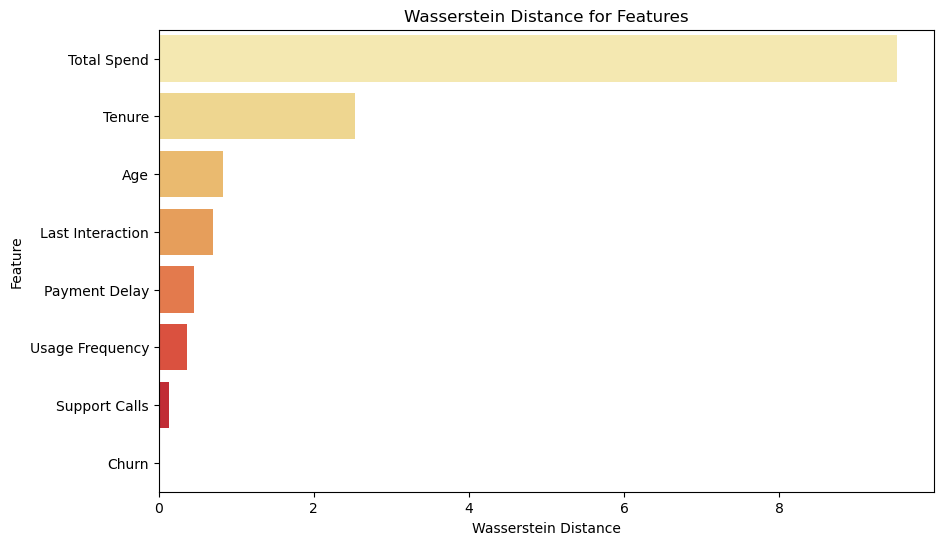

In [10]:
se.bar_plot_test_results(se.wasserstein_distance())

- For most of the features the distance is small
- The model might need improvement on Total Spend and maybe Tenure.



# Evaluating Machine Learning Efficacy Between Real and Synthetic Data Using TGAN

Checking accuracy for the model trained with real data

In [11]:
from services.ml_evaluation import evaluate_model

In [12]:
pp = Preprocess()

In [13]:
model_path = "./model/real_data_logistic_regression.pkl"
synthetic_data, real_data = pp.run_preprocess("customer_churn_dataset-testing-master.csv", "synthetic_data_tgan.csv")
target_column = "Churn"

data loaded, shape - (64374, 12)
data loaded, shape - (500000, 11)


In [14]:
evaluate_model(model_path, real_data, target_column)

Data transformed, shape - (64374, 12)
Model Evaluation Metrics:
Accuracy: 0.5556
F1 Score: 0.4695
AUC-ROC: 0.6825918809068181

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.68      0.62     33881
           1       0.54      0.42      0.47     30493

    accuracy                           0.56     64374
   macro avg       0.55      0.55      0.54     64374
weighted avg       0.55      0.56      0.55     64374



Checking accuracy for model trained with synthetic data TGAN

In [15]:
model_path = "./model/synthetic_tgan_logistic_regression.pkl"
synthetic_data, real_data = pp.run_preprocess("customer_churn_dataset-testing-master.csv", "synthetic_data_tgan.csv")
target_column = "Churn"

data loaded, shape - (64374, 12)
data loaded, shape - (500000, 11)


In [16]:
evaluate_model(model_path, real_data, target_column)

Data transformed, shape - (64374, 12)
Model Evaluation Metrics:
Accuracy: 0.6508
F1 Score: 0.7115
AUC-ROC: 0.7337899453874266

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.42      0.56     33881
           1       0.58      0.91      0.71     30493

    accuracy                           0.65     64374
   macro avg       0.71      0.66      0.63     64374
weighted avg       0.72      0.65      0.63     64374



Checking if the data augmentation by adding synthetic data is better than resampling the real training data

Case 1: Trying with the model that was trained with duplicated upsampled data

In [17]:
model_path = "./model/duplicated_real_data_logistic_regression.pkl"
synthetic_data, real_data = pp.run_preprocess("customer_churn_dataset-testing-master.csv", "synthetic_data_tgan.csv")
target_column = "Churn"

data loaded, shape - (64374, 12)
data loaded, shape - (500000, 11)


In [18]:
evaluate_model(model_path, real_data, target_column)

Data transformed, shape - (64374, 12)
Model Evaluation Metrics:
Accuracy: 0.5547
F1 Score: 0.4692
AUC-ROC: 0.6823097517849614

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.68      0.62     33881
           1       0.54      0.42      0.47     30493

    accuracy                           0.55     64374
   macro avg       0.55      0.55      0.54     64374
weighted avg       0.55      0.55      0.55     64374



Case 2: We will augment the real data with synthetic data

In [19]:
model_path = "./model/augmented_tgan_logistic_regression.pkl"
synthetic_data, real_data = pp.run_preprocess("customer_churn_dataset-testing-master.csv", "synthetic_data_tgan.csv")
target_column = "Churn"

data loaded, shape - (64374, 12)
data loaded, shape - (500000, 11)


In [20]:
evaluate_model(model_path, real_data, target_column)

Data transformed, shape - (64374, 12)
Model Evaluation Metrics:
Accuracy: 0.6526
F1 Score: 0.6792
AUC-ROC: 0.719453108575677

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.54      0.62     33881
           1       0.60      0.78      0.68     30493

    accuracy                           0.65     64374
   macro avg       0.67      0.66      0.65     64374
weighted avg       0.67      0.65      0.65     64374



# Data Pre-processing for TVAE

In [21]:
pp = Preprocess()

In [22]:
synthetic_data_vae, real_data = pp.run_preprocess("customer_churn_dataset-training-master.csv", "synthetic_data_tvae.csv")


data loaded, shape - (440833, 12)
data loaded, shape - (500000, 11)


# Evaluating Statistical Similarity Between Real and Synthetic Data Using TVAE

In [23]:
se = statistical_evaluation(real_data, synthetic_data_vae)

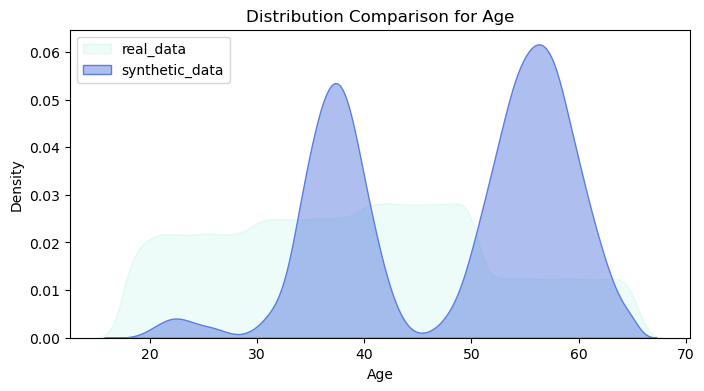

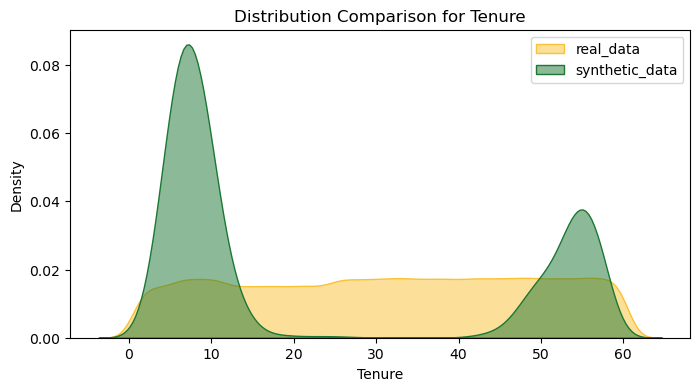

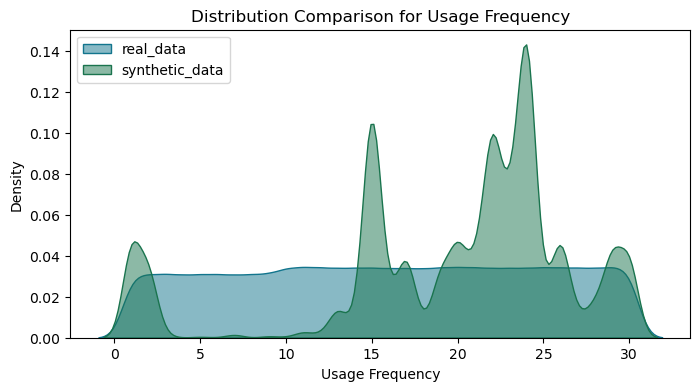

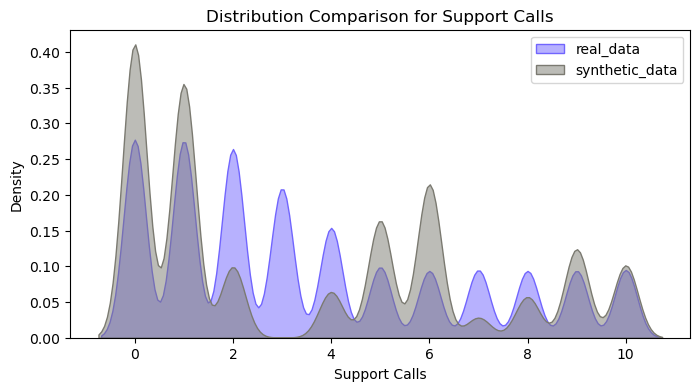

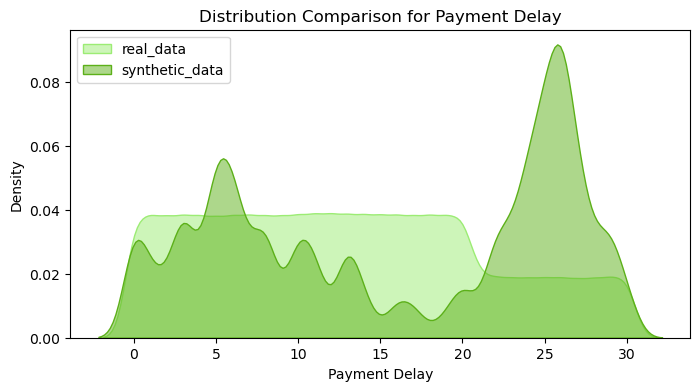

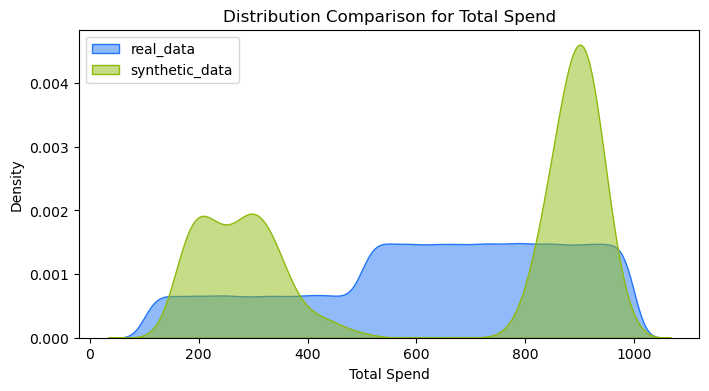

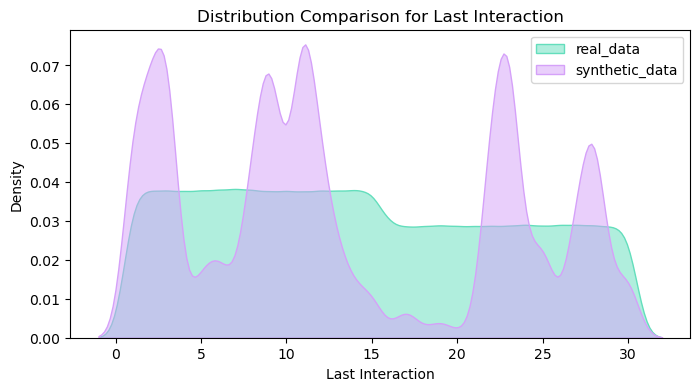

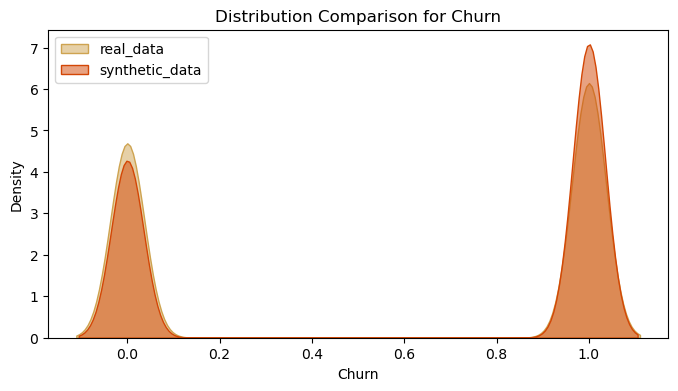

In [24]:
se.compare_all_distributions()

### Chi-Square test

Gender: Chi-Square Stat=1.0918, p-value=0.2961
Subscription Type: Chi-Square Stat=3.6698, p-value=0.4525
Contract Length: Chi-Square Stat=2.2143, p-value=0.6964


c:\Users\joyri\OneDrive\Documents\Classes\Emerging Technologies\GAN-vs-VAE-synthetic-data-comparison\services\statistical_evaluation.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_name, y="Feature", data=results_df, ax=axes[0], palette=self.get_random_palette_name())
c:\Users\joyri\OneDrive\Documents\Classes\Emerging Technologies\GAN-vs-VAE-synthetic-data-comparison\services\statistical_evaluation.py:111: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\joyri\OneDrive\Documents\Classes\Emerging Technologies\GAN-vs-VAE-synthetic-data-comparison\services\statistical_evaluation.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed i

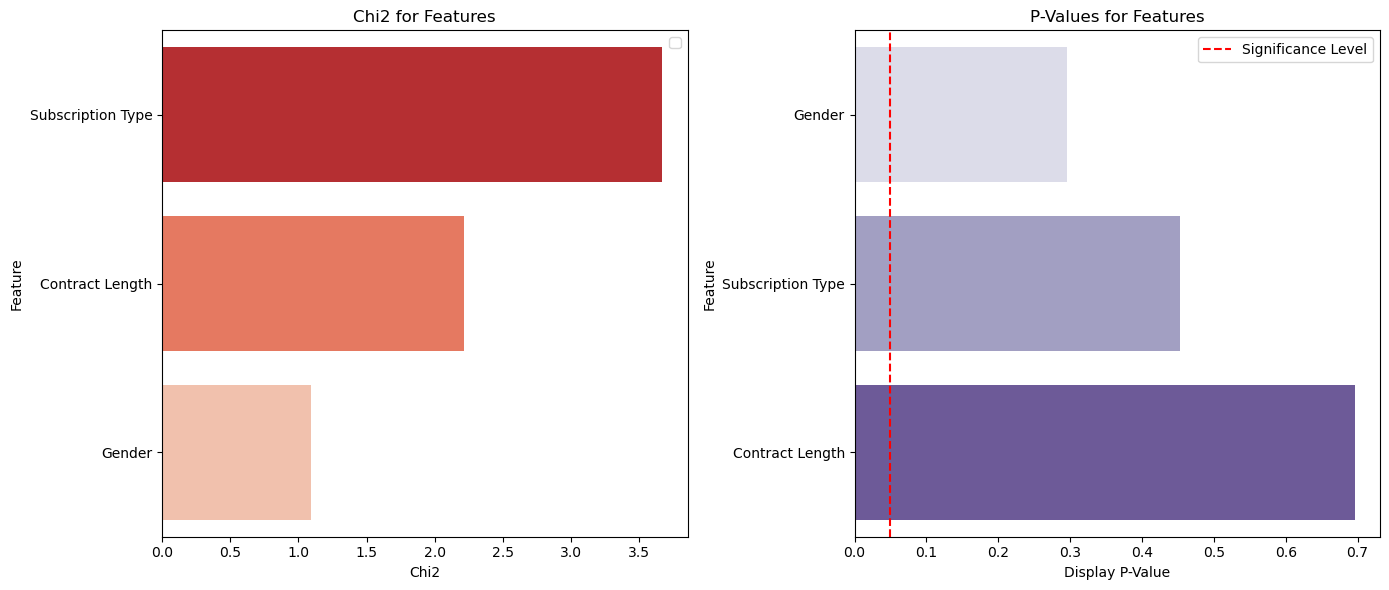

In [25]:
se.bar_plot_test_results(se.chi_square_test())

### Kolmogorov–Smirnov test

c:\Users\joyri\OneDrive\Documents\Classes\Emerging Technologies\GAN-vs-VAE-synthetic-data-comparison\services\statistical_evaluation.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_name, y="Feature", data=results_df, ax=axes[0], palette=self.get_random_palette_name())
c:\Users\joyri\OneDrive\Documents\Classes\Emerging Technologies\GAN-vs-VAE-synthetic-data-comparison\services\statistical_evaluation.py:111: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\joyri\OneDrive\Documents\Classes\Emerging Technologies\GAN-vs-VAE-synthetic-data-comparison\services\statistical_evaluation.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed i

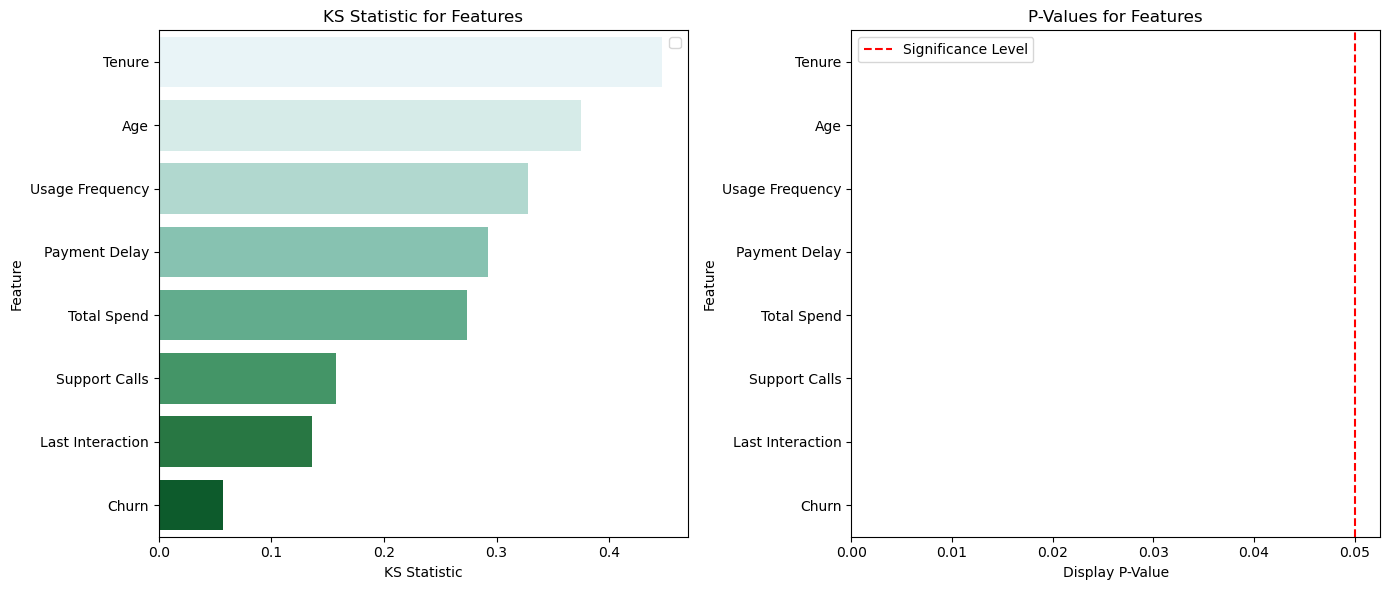

In [26]:
se.bar_plot_test_results(se.ks_test())

### Wasserstein Distance

c:\Users\joyri\OneDrive\Documents\Classes\Emerging Technologies\GAN-vs-VAE-synthetic-data-comparison\services\statistical_evaluation.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Wasserstein Distance", y="Feature", data=results_df, palette=self.get_random_palette_name())


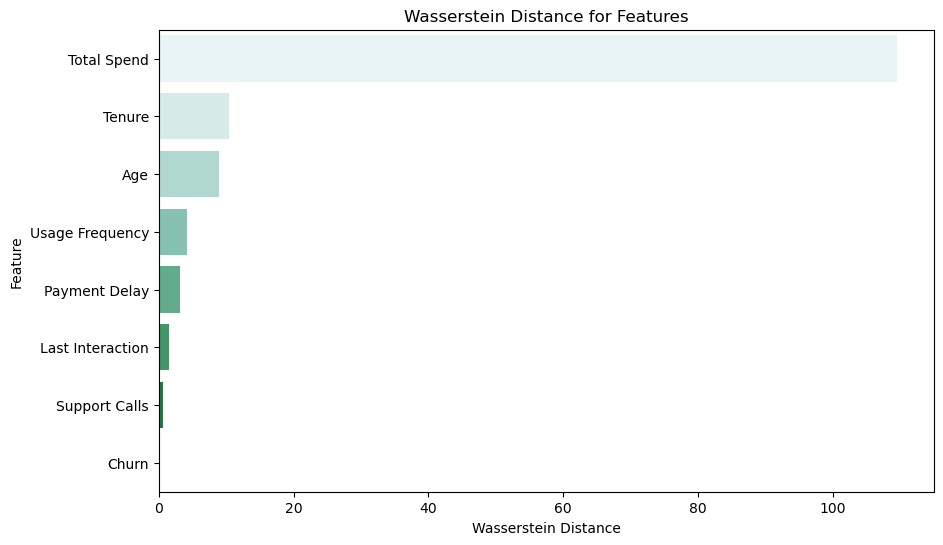

In [27]:
se.bar_plot_test_results(se.wasserstein_distance())

# Evaluating Machine Learning Efficacy Between Real and Synthetic Data Using TVAE

Checking accuracy for model trained with synthetic data TVAE

In [28]:
model_path = "./model/synthetic_tvae_logistic_regression.pkl"
synthetic_data, real_data = pp.run_preprocess("customer_churn_dataset-testing-master.csv", "synthetic_data_tvae.csv")
target_column = "Churn"

data loaded, shape - (64374, 12)
data loaded, shape - (500000, 11)


In [29]:
evaluate_model(model_path, real_data, target_column)

Data transformed, shape - (64374, 12)
Model Evaluation Metrics:
Accuracy: 0.5115
F1 Score: 0.6402
AUC-ROC: 0.6196253228430101

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.15      0.24     33881
           1       0.49      0.92      0.64     30493

    accuracy                           0.51     64374
   macro avg       0.58      0.53      0.44     64374
weighted avg       0.58      0.51      0.43     64374



Training data augmented with synthetic VAE data

In [30]:
model_path = "./model/augmented_tvae_logistic_regression.pkl"
synthetic_data, real_data = pp.run_preprocess("customer_churn_dataset-testing-master.csv", "synthetic_data_tvae.csv")
target_column = "Churn"

data loaded, shape - (64374, 12)
data loaded, shape - (500000, 11)


In [31]:
evaluate_model(model_path, real_data, target_column)

Data transformed, shape - (64374, 12)
Model Evaluation Metrics:
Accuracy: 0.6076
F1 Score: 0.6338
AUC-ROC: 0.6454737590002819

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.51      0.58     33881
           1       0.57      0.72      0.63     30493

    accuracy                           0.61     64374
   macro avg       0.62      0.61      0.61     64374
weighted avg       0.62      0.61      0.60     64374

